In [4]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import datetime as dt

In [5]:
trips_all=pd.read_csv("trip.csv")
trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
283460,243090,186,4/9/2014 23:33,Commercial at Montgomery,45,4/9/2014 23:36,Market at Sansome,77,397,Subscriber,94112
283461,243089,184,4/9/2014 23:32,Redwood City Caltrain Station,22,4/9/2014 23:35,Mezes Park,83,216,Subscriber,94063
283462,243088,765,4/9/2014 23:31,Embarcadero at Sansome,60,4/9/2014 23:43,Market at 4th,76,267,Subscriber,94108
283463,243087,1006,4/9/2014 23:29,San Francisco Caltrain (Townsend at 4th),70,4/9/2014 23:46,San Francisco Caltrain (Townsend at 4th),70,512,Customer,94127
283464,243086,328,4/9/2014 23:21,Steuart at Market,74,4/9/2014 23:26,Davis at Jackson,42,620,Subscriber,94111


In [6]:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek #nro 5 es sabado, 6 es domingo
trips['numero_mes'] = trips.start_date.dt.month
trips.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dayofweek,numero_mes
283460,243090,186,2014-04-09 23:33:00,Commercial at Montgomery,45,4/9/2014 23:36,Market at Sansome,77,397,Subscriber,94112,2,4
283461,243089,184,2014-04-09 23:32:00,Redwood City Caltrain Station,22,4/9/2014 23:35,Mezes Park,83,216,Subscriber,94063,2,4
283462,243088,765,2014-04-09 23:31:00,Embarcadero at Sansome,60,4/9/2014 23:43,Market at 4th,76,267,Subscriber,94108,2,4
283463,243087,1006,2014-04-09 23:29:00,San Francisco Caltrain (Townsend at 4th),70,4/9/2014 23:46,San Francisco Caltrain (Townsend at 4th),70,512,Customer,94127,2,4
283464,243086,328,2014-04-09 23:21:00,Steuart at Market,74,4/9/2014 23:26,Davis at Jackson,42,620,Subscriber,94111,2,4


In [7]:
trips_weekend = trips[(trips['dayofweek']==5) | (trips['dayofweek']==6)]
#trips_weekend_6 = trips[(trips['dayofweek']==6)]
#trips_weekend = pd.concat([trips_weekend_5, trips_weekend_6], axis=0)

In [8]:
viajes_total=trips_weekend['id'].count()
viajes_subscribers=trips_weekend[trips_weekend['subscription_type']=='Subscriber']['id'].count()
viajes_customers=trips_weekend[trips_weekend['subscription_type']=='Customer']['id'].count()

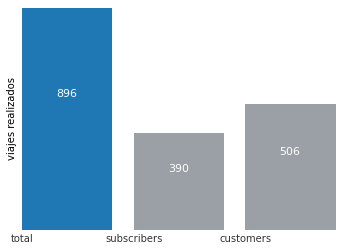

In [126]:
%matplotlib inline
plot.figure()
users=['total','subscribers','customers']
cantidad=[viajes_total,viajes_subscribers,viajes_customers]
pos = np.arange(len(users))

bars=plot.bar(pos,cantidad)
plot.xticks(pos,users)
plot.ylabel('viajes realizados')

plot.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

for spine in plot.gca().spines.values():
    spine.set_visible(False)

# make one bar a contrasting color

bars[0].set_color('#1F77B4')
bars[1].set_color('#9AA0A6')
bars[2].set_color('#9AA0A6')

# soften all labels by turning grey
plot.xticks(pos, users, alpha=0.8)
    
# direct label each bar with Y axis values
for bar in bars:
    plot.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - bar.get_height()*0.40 , str(int(bar.get_height())) ,ha='center', color='w', fontsize=11,zorder=20)
    
plot.show()

In [32]:
#Ahora porcentaje total del archivo:
trips_all['start_date'] = pd.to_datetime((trips_all['start_date']))
trips_all['dayofweek'] = trips_all.start_date.dt.dayofweek
trips_all['numero_mes'] = trips_all.start_date.dt.month
trips_all = trips_all[(trips_all['dayofweek']==5) | (trips_all['dayofweek']==6)]

trips_S = trips_all[(trips_all['subscription_type']=='Subscriber')]
trips_C = trips_all[(trips_all['subscription_type']=='Customer')]

#viajes_total_S=trips_S[trips_S['numero_mes']==1]['id'].count()
#viajes_total_C=trips_C[trips_C['numero_mes']==1]['id'].count()
#viajes_total_S, viajes_total_C
#hay que unir los que tienen cada mes
#hay que hacer una lista? o hay forma de juntarlos? creo que hay que hacer calve-valor

#Grafico con puntitos, de bicicletas usadas por S y C en fin de semana. Puede ser por hora o solo por mes directo
cantidad_viajes_S=trips_S[['numero_mes','id']].groupby('numero_mes').count()
cantidad_viajes_C=trips_C[['numero_mes','id']].groupby('numero_mes').count()
cantidad_viajes_totales = trips_all[['numero_mes','id']].groupby('numero_mes').count()


#viajes_total=trips_weekend['id'].count()
#viajes_subscribers=trips_weekend[trips_weekend['subscription_type']=='Subscriber']['id'].count()
#viajes_customers=trips_weekend[trips_weekend['subscription_type']=='Customer']['id'].count()

#porcentaje_subscribers = viajes_subscribers*100/viajes_total
#porcentaje_customers = viajes_customers*100/viajes_total
#print 'Porcentaje suscriptores: ',porcentaje_subscribers,'\nPorcentaje no suscriptores: ', porcentaje_customers


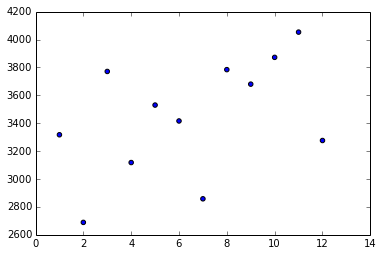

In [33]:
plot.scatter(cantidad_viajes_S.index, cantidad_viajes_S.loc[:,'id'])
#plot.scatter(meses,cantidad_viajes_en_mes )

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name=u'numero_mes')

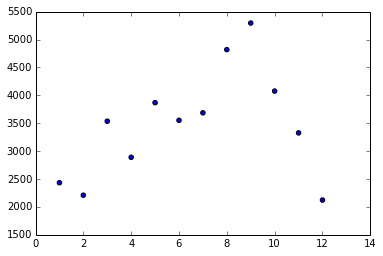

In [34]:
plot.scatter(cantidad_viajes_C.index, cantidad_viajes_C.loc[:,'id'])
cantidad_viajes_C.index

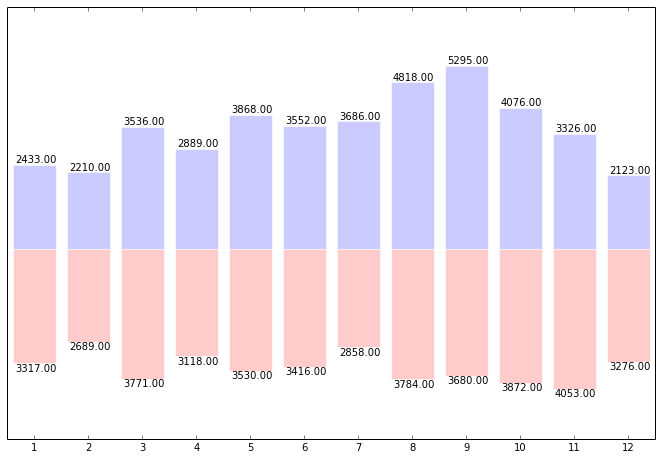

In [35]:
X = np.arange(len(cantidad_viajes_C.index))
Y1 = cantidad_viajes_C.loc[:,'id']
Y2 = cantidad_viajes_S.loc[:,'id']

plot.axes([0.025, 0.025, 1.5, 1.5])
plot.bar(X, Y1, facecolor='#9999ff', edgecolor='white', align="center", alpha=.5) #no subscriptos
plot.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', align="center", alpha=.5) #subscriptos

for x, y in zip(X, Y1):
    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

for x, y in zip(X, Y2):
    plot.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='right', va= 'top')


plot.xlim(-.5,len(cantidad_viajes_C.index)-0.5)
plot.xticks(X, cantidad_viajes_C.index)

plot.ylim(-5500, 7000) #solo para que quede lindo, igual deberia ser segun los valores blabla..
plot.yticks(())

plot.show()

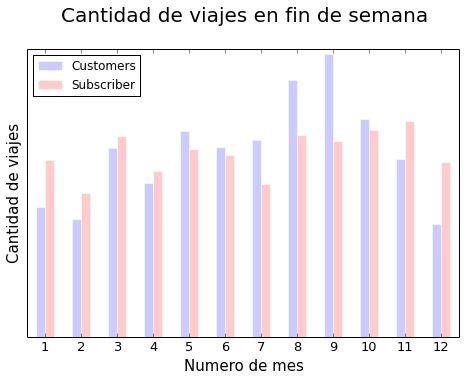

In [133]:
from numpy import ma

X = np.arange(len(cantidad_viajes_C.index))
Y1 = cantidad_viajes_C.loc[:,'id']
Y2 = cantidad_viajes_S.loc[:,'id']
Y3 = cantidad_viajes_totales.loc[:,'id']

plot.axes([0.025, 0.025, 1, 1])
#plot.bar(X + 0.25, Y3, width = 0.5, align="center")
plot.bar(X - 0.12, Y1, facecolor='#9999ff', edgecolor='white',  alpha=.5, width = 0.25, align="center", label="Customers") #no subscriptos, azul #alpha es la opacidad
plot.bar(X + 0.00, Y2, facecolor='#ff9999', edgecolor='white',  alpha=.5, width = 0.25, label="Subscriber") #subscriptos, rojo


#for x, y in zip(X, Y1):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

#for x, y in zip(X, Y2):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'top')

plot.xlim(-.5,len(cantidad_viajes_C.index)-0.5)
plot.xticks(X, cantidad_viajes_C.index, fontsize = 13)
plot.xlabel('Numero de mes', fontsize = 15)

plot.ylim(0, 5400) #solo para que quede lindo, igual deberia ser segun los valores blabla..
plot.yticks(())
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes en fin de semana\n', fontsize = 18)

plot.legend(loc="upper left")
plot.show()